# Analysis:

The following analysis randomly selects 500+ cities of varying distance from the equator and gathers data on the Temperature, Humidity, Cloudiness, and Wind Speed in each city.

1. Of the observed variables, Temperature is most closely correlated with distance from the equator.

2. There is no observable trend between Latitude and Wind Speed or Cloudiness.

3. It would take deeper analysis to draw a conclusion on the correlation between Latitude and Humidity. There appears to be a patterns but it is not very discernable and would take several rounds of random data and perhaps a regression analysis.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import datetime, time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# Remove duplicates
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


593

In [3]:
city_weather = pd.DataFrame(cities)
city_weather.head()

,0
0,rikitea
1,bronnoysund
2,amapa
3,airai
4,lata


## Perform API Calls

In [4]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 


In [5]:
final_cities = []
latitude = []
temperature = []
humidity = []
cloudiness = []
wind = []


for city in cities:
    time.sleep(1)
    city_number = cities.index(city)
    try:
        query_url = url + "&q=" + city
        response = requests.get(query_url).json()        
        latitude.append(response['coord']['lat'])
        temperature.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        print(f'{city_number}: Retreiving data for {city}')
        print(f'      ------> Data successfully stored!')
        final_cities.append(response['name'])
    except:
        print(f'{city_number}: Retreiving data for {city}')
        print(f'ERROR: DATA UNAVAILABLE')
        pass
#         continue

0: Retreiving data for rikitea
      ------> Data successfully stored!
1: Retreiving data for bronnoysund
      ------> Data successfully stored!
2: Retreiving data for amapa
      ------> Data successfully stored!
3: Retreiving data for airai
      ------> Data successfully stored!
4: Retreiving data for lata
      ------> Data successfully stored!
5: Retreiving data for cape town
      ------> Data successfully stored!
6: Retreiving data for ribeira grande
      ------> Data successfully stored!
7: Retreiving data for albany
      ------> Data successfully stored!
8: Retreiving data for mataura
      ------> Data successfully stored!
9: Retreiving data for kothapet
      ------> Data successfully stored!
10: Retreiving data for bluff
      ------> Data successfully stored!
11: Retreiving data for obihiro
      ------> Data successfully stored!
12: Retreiving data for palana
      ------> Data successfully stored!
13: Retreiving data for monforte de lemos
      ------> Data successful

114: Retreiving data for luderitz
      ------> Data successfully stored!
115: Retreiving data for rawlins
      ------> Data successfully stored!
116: Retreiving data for mar del plata
      ------> Data successfully stored!
117: Retreiving data for san nicolas
      ------> Data successfully stored!
118: Retreiving data for pangnirtung
      ------> Data successfully stored!
119: Retreiving data for barentsburg
ERROR: DATA UNAVAILABLE
120: Retreiving data for castro
      ------> Data successfully stored!
121: Retreiving data for sholapur
ERROR: DATA UNAVAILABLE
122: Retreiving data for berdigestyakh
      ------> Data successfully stored!
123: Retreiving data for cabo san lucas
      ------> Data successfully stored!
124: Retreiving data for hithadhoo
      ------> Data successfully stored!
125: Retreiving data for butaritari
      ------> Data successfully stored!
126: Retreiving data for kodiak
      ------> Data successfully stored!
127: Retreiving data for chumikan
      ------>

227: Retreiving data for zhangye
      ------> Data successfully stored!
228: Retreiving data for inuvik
      ------> Data successfully stored!
229: Retreiving data for rawson
      ------> Data successfully stored!
230: Retreiving data for talnakh
      ------> Data successfully stored!
231: Retreiving data for ballarat
      ------> Data successfully stored!
232: Retreiving data for cacequi
      ------> Data successfully stored!
233: Retreiving data for port blair
      ------> Data successfully stored!
234: Retreiving data for igarka
      ------> Data successfully stored!
235: Retreiving data for russell
      ------> Data successfully stored!
236: Retreiving data for carnarvon
      ------> Data successfully stored!
237: Retreiving data for yeppoon
      ------> Data successfully stored!
238: Retreiving data for mana
      ------> Data successfully stored!
239: Retreiving data for pilibanga
      ------> Data successfully stored!
240: Retreiving data for qaanaaq
      ------> Da

340: Retreiving data for saint anthony
      ------> Data successfully stored!
341: Retreiving data for camacha
      ------> Data successfully stored!
342: Retreiving data for dingle
      ------> Data successfully stored!
343: Retreiving data for sobolevo
      ------> Data successfully stored!
344: Retreiving data for milingimbi
ERROR: DATA UNAVAILABLE
345: Retreiving data for port hedland
      ------> Data successfully stored!
346: Retreiving data for kamiiso
      ------> Data successfully stored!
347: Retreiving data for tura
      ------> Data successfully stored!
348: Retreiving data for seoul
      ------> Data successfully stored!
349: Retreiving data for awjilah
      ------> Data successfully stored!
350: Retreiving data for lolua
ERROR: DATA UNAVAILABLE
351: Retreiving data for ketchikan
      ------> Data successfully stored!
352: Retreiving data for rafaela
      ------> Data successfully stored!
353: Retreiving data for skagastrond
ERROR: DATA UNAVAILABLE
354: Retreivi

453: Retreiving data for padang
      ------> Data successfully stored!
454: Retreiving data for samarai
      ------> Data successfully stored!
455: Retreiving data for lakes entrance
      ------> Data successfully stored!
456: Retreiving data for kattivakkam
      ------> Data successfully stored!
457: Retreiving data for kiunga
      ------> Data successfully stored!
458: Retreiving data for nizhniy tsasuchey
      ------> Data successfully stored!
459: Retreiving data for nakamura
      ------> Data successfully stored!
460: Retreiving data for biltine
      ------> Data successfully stored!
461: Retreiving data for hualmay
      ------> Data successfully stored!
462: Retreiving data for dali
      ------> Data successfully stored!
463: Retreiving data for skhisma
      ------> Data successfully stored!
464: Retreiving data for sola
      ------> Data successfully stored!
465: Retreiving data for alice springs
      ------> Data successfully stored!
466: Retreiving data for cairns

565: Retreiving data for anadyr
      ------> Data successfully stored!
566: Retreiving data for ikole
ERROR: DATA UNAVAILABLE
567: Retreiving data for fort nelson
      ------> Data successfully stored!
568: Retreiving data for dzilam gonzalez
      ------> Data successfully stored!
569: Retreiving data for coxim
      ------> Data successfully stored!
570: Retreiving data for ninh binh
      ------> Data successfully stored!
571: Retreiving data for la sarre
      ------> Data successfully stored!
572: Retreiving data for bras-panon
      ------> Data successfully stored!
573: Retreiving data for diebougou
      ------> Data successfully stored!
574: Retreiving data for shchors
      ------> Data successfully stored!
575: Retreiving data for ihosy
      ------> Data successfully stored!
576: Retreiving data for utiroa
ERROR: DATA UNAVAILABLE
577: Retreiving data for moyale
      ------> Data successfully stored!
578: Retreiving data for arman
      ------> Data successfully stored!
5

In [6]:
len(final_cities)

537

In [7]:
weather_data = {
    "City": final_cities,
    "Latitude": latitude,
    "Temperature (F)": temperature,
    "Humidity (%)": humidity,
    "Cloudiness (%)": cloudiness,
    "Wind Speed (mph)": wind
}



In [8]:
city_weather = pd.DataFrame(weather_data)
city_weather.head()

,City,Latitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Rikitea,-23.12,81.86,98,0,9.53
1,Bronnoysund,65.46,30.20,50,12,18.34
2,Amapa,15.09,78.80,74,75,9.17
3,Airai,-8.93,80.15,78,44,2.15
4,Lata,30.78,32.85,100,92,1.36


In [9]:
#What follows is an unsuccessful attempt to append variables directly into a dataframe named city_weather with an index of "cities" and blank columns for Temp, Humidity, etc
#I changed my method to gather separate lists first, then compile a dataframe, since I could not identify the Key Error

#for index, row in city_weather.iterrows():
#    time.sleep(2)
#    query_url = url + "&q=" + city
#    weather_response = requests.get(query_url)
#    weather_json = weather_response.json()
#    try:
#        temperature = city_weather["main"]["temp"]
#        humidity = city_weather["main"]["humidity"]
#        cloudiness = city_weather["clouds"]["all"]
#        wind_speed = city_weather["wind"]["speed"]
#        latitude = city_weather["coord"]["lat"]
        
#        city_weather.set_value(index, "Temperature", temperature)
#        city_weather.set_value(index,"Humidity", humidity)
#        city_weather.set_value(index,"Cloudiness", cloudiness)
#        city_weather.set_value(index,"Wind Speed", wind_speed)
#    except:
#        print("Weather data error- skipped")
        

In [10]:
city_weather.to_csv("city-weather.csv", index=False, header=True)

In [11]:
date = time.strftime("%D")

date

'01/31/19'

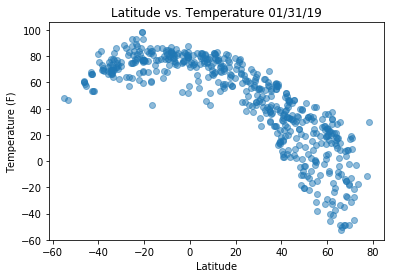

In [12]:
plt.scatter(city_weather["Latitude"],city_weather["Temperature (F)"], alpha = 0.5)

plt.title(f'Latitude vs. Temperature {date}')
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")



plt.savefig("Temp.png")
plt.show()

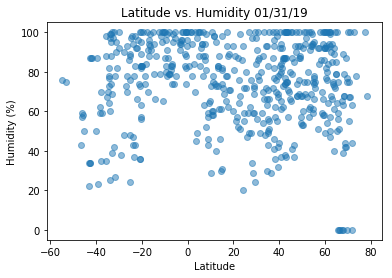

In [13]:
plt.scatter(city_weather["Latitude"],city_weather["Humidity (%)"], alpha = 0.5)

plt.title(f'Latitude vs. Humidity {date}')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")



plt.savefig("Humid.png")
plt.show()

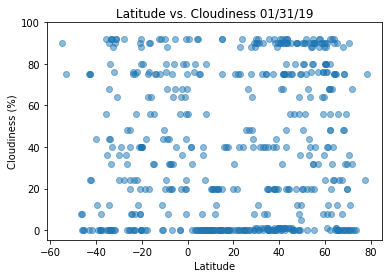

In [15]:
plt.scatter(city_weather["Latitude"],city_weather["Cloudiness (%)"], alpha = 0.5)

plt.title(f'Latitude vs. Cloudiness {date}')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(top=100)



plt.savefig("Cloud.png")
plt.show()

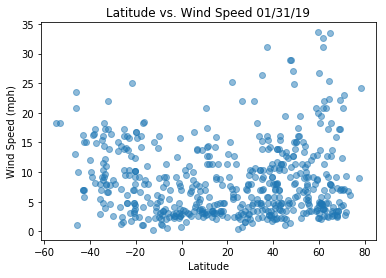

In [16]:
plt.scatter(city_weather["Latitude"],city_weather["Wind Speed (mph)"], alpha = 0.5)

plt.title(f'Latitude vs. Wind Speed {date}')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")



plt.savefig("Wind.png")
plt.show()